In [5]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pickle
import random
import re

In [167]:
meta_file = 'raw_data/digit_experiment/MNIST_rand50_u.txt'
reader = open(meta_file, 'r')
ground_truth = np.zeros(shape=(10, 10, 10), dtype=np.float64)
for cnt in range(1200):
    line = reader.readline().split()
    if len(line) == 0:
        break
    if cnt >= 6:
        ground_truth[int(line[0][1]), int(line[1][0]), int(line[2][0])] = int(line[3])
print(np.sum((ground_truth > 0).astype(np.int)))
ground_truth /= np.sum(ground_truth)

500


In [168]:
folder_name = 'raw_data/big_rand50/no_aux_no_exce_%s_%d'

lr_list = ['0.0002', '0.0001', '5e-05', '2e-05']
bs_list = [64, 256]

In [169]:
def read_arr(lr, bs):
    prog = re.compile(r'^[0-9]+$')
    iterations = [int(item) for item in os.listdir(folder_name % (lr, bs)) if prog.match(item)]
    iterations.sort()
    iterations = iterations[:-1]

    arrs = []
    for iteration in iterations:
        arr = np.load(os.path.join(folder_name % (lr, bs), str(iteration)), encoding = 'latin1')
        arr /= np.sum(arr)
        arrs.append(arr)
    arrs = np.stack(arrs, axis=0)
    return iterations, arrs

In [170]:
def read_samples(lr, bs):
    prog = re.compile(r'^d_[0-9]+$')
    iterations = [int(item.split('_')[1]) for item in os.listdir(folder_name % (lr, bs)) if prog.match(item)]
    iterations.sort()
    iterations = iterations[:-1]

    arrs = []
    for iteration in iterations:
        arr = np.load(os.path.join(folder_name % (lr, bs), 'd_%d' % iteration), encoding = 'latin1')
        arrs.append(arr)
    arrs = np.concatenate(arrs, axis=0)
    return iterations, arrs.astype(np.int)

In [196]:
iterations, arrs = read_arr(lr_list[3], bs_list[1])
_, samples = read_samples(lr_list[3], bs_list[1])

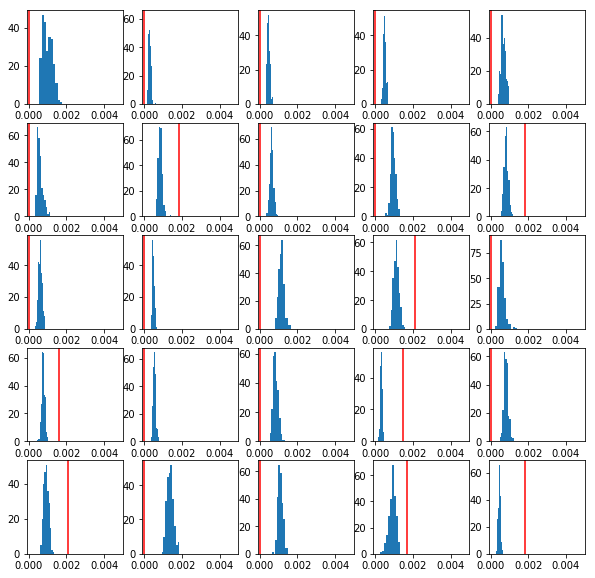

In [197]:
plt.figure(figsize=[10, 10])
for i in range(5):
    for j in range(5):
        plt.subplot(5, 5, i*5+j+1) 
        x, y, z = random.randint(0, 9), random.randint(0, 9), random.randint(0, 9)
        plt.hist(arrs[:, x, y, z], bins=10)
        plt.axvline(x=ground_truth[x, y, z], c='r')
        plt.xlim([-0.0001, 0.005])
plt.show()

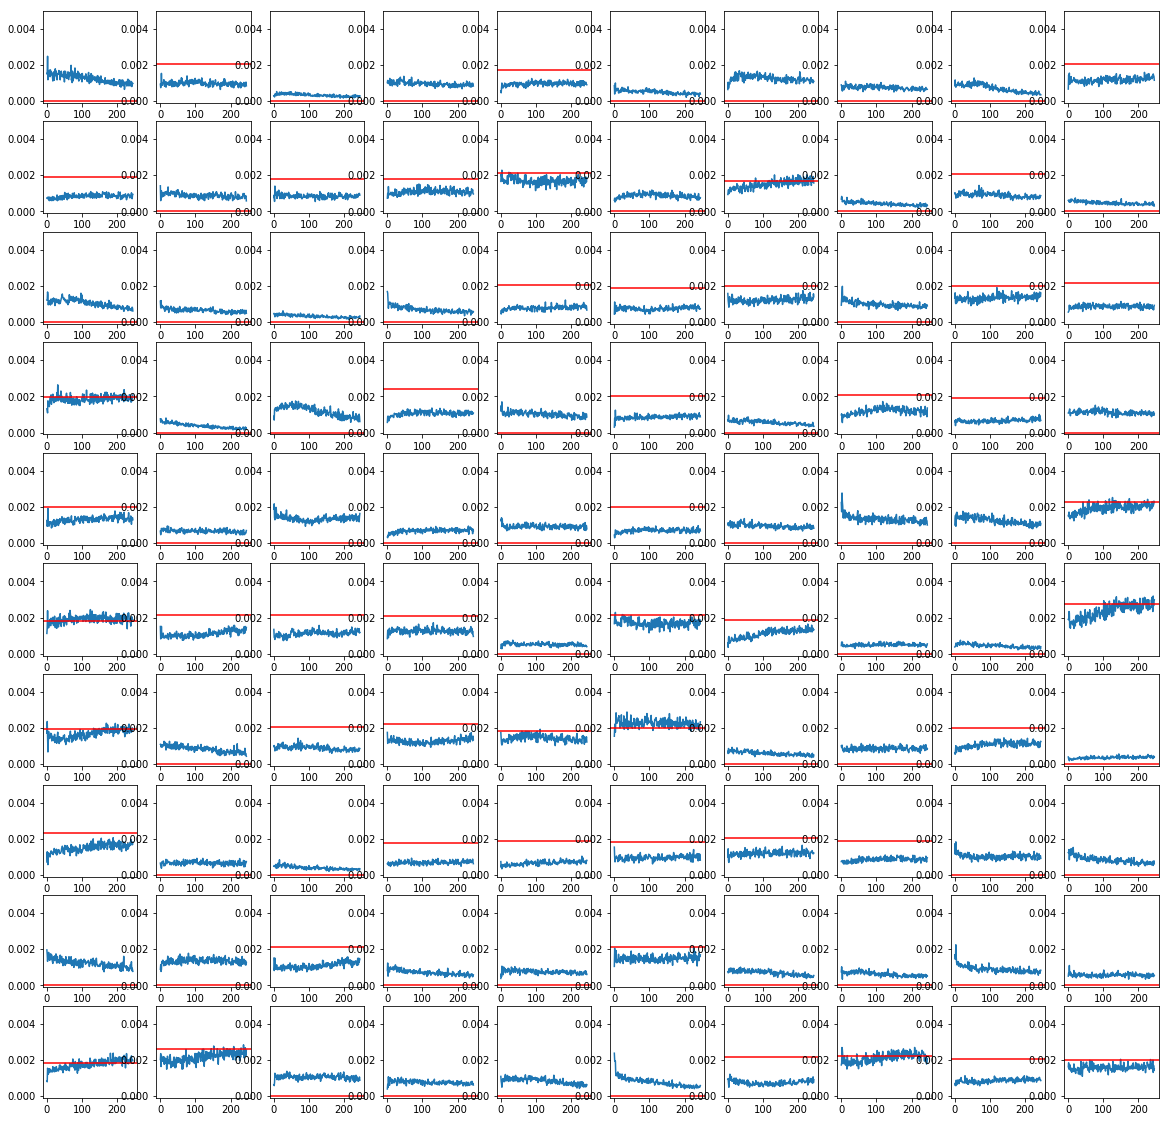

In [198]:
plt.figure(figsize=[20, 20])
for i in range(10):
    for j in range(10):
        plt.subplot(10, 10, i*10+j+1) 
        x, y, z = random.randint(0, 9), random.randint(0, 9), random.randint(0, 9)
        plt.plot(arrs[:, x, y, z])
        plt.axhline(y=ground_truth[x, y, z], c='r')
        plt.ylim([-0.0001, 0.005])
plt.show()

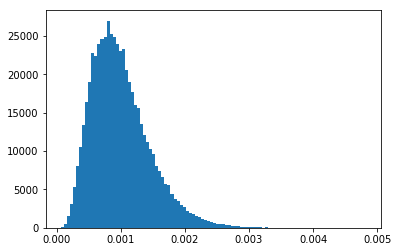

In [183]:
plt.hist(arrs.flatten(), bins=100)
plt.show()

In [148]:
# Compute running avg of previous samples
def compute_dist(length=1000):
    top_dist = []
    mid_dist = []
    assert len(iterations) == arrs.shape[0]
    for index, iteration in enumerate(iterations):
        bincounts = np.bincount(samples[iteration-length:iteration].flatten())
        ordering = np.argsort(bincounts)
        top_bins = ordering[800:1000]
        mid_bins = ordering[600:800]

        for item in top_bins:
            i, j, k = item // 100, item // 10 % 10, item % 10
            top_dist.append(arrs[index, i, j, k])

        for item in mid_bins:
            i, j, k = item // 100, item // 10 % 10, item % 10
            mid_dist.append(arrs[index, i, j, k])
    return top_dist, mid_dist

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:3075: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


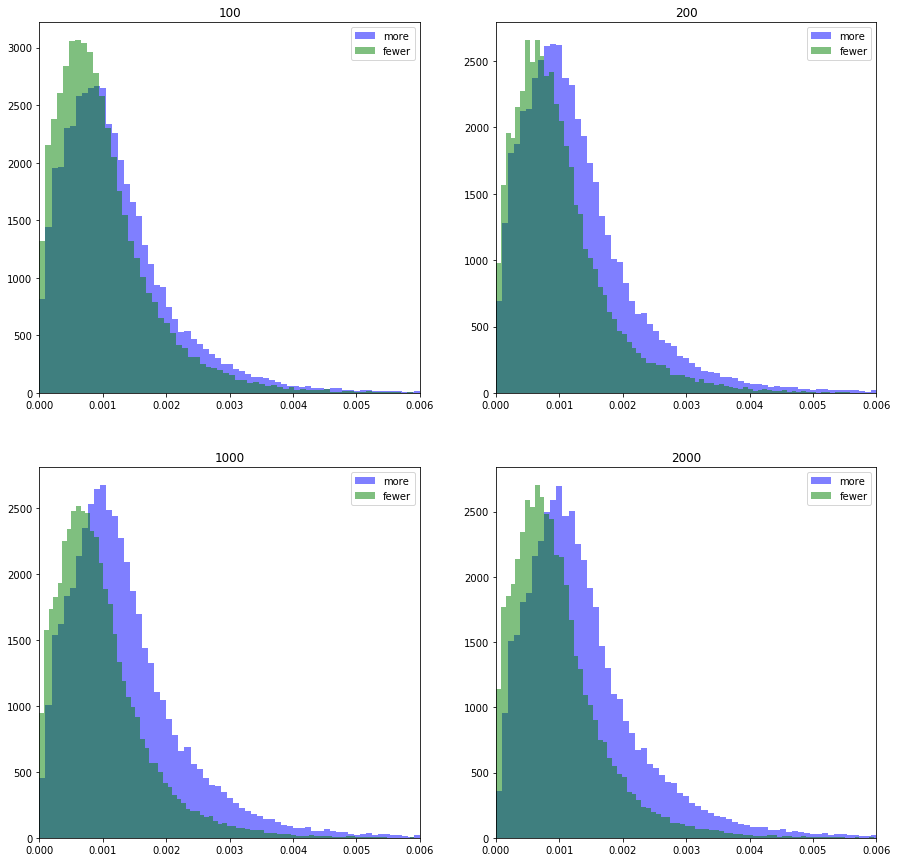

In [149]:
plt.figure(figsize=[15, 15])
for index, length in enumerate([100, 200, 1000, 2000]):
    plt.subplot(2, 2, index+1)
    top_dist, mid_dist = compute_dist(length)
    plt.hist(top_dist, bins=100, color='b', label='more', alpha=0.5)
    plt.hist(mid_dist, bins=100, color='g', label='fewer', alpha=0.5, hold=True)
    plt.title('%d' % length)
    plt.xlim([0, 0.006])
    plt.legend()
plt.show()

In [186]:
hist = np.bincount(samples.flatten())
np.sum(hist[np.where(hist < 10000)[0]]).astype(np.float) / np.sum(hist)

0.046405465949820791

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:3075: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


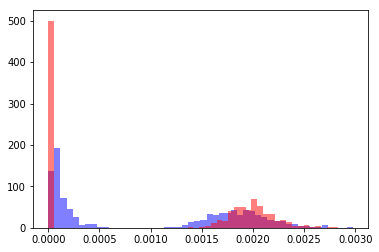

In [195]:
bincount = np.bincount(samples.flatten())
plt.hist(bincount.astype(np.float)/np.sum(bincount), bins=50, color='b', alpha=0.5)
plt.hist(ground_truth.flatten(), bins=50, color='r', alpha=0.5, hold=True)
plt.show()

In [188]:
def plot_hist(arrs, title):
    mask = np.tile((ground_truth > 0), [arrs.shape[0], 1, 1, 1])
    arrs[mask].shape
    plt.hist(arrs[mask], bins=50, color='b', alpha=0.5, label='true')
    plt.hist(arrs[np.logical_not(mask)], bins=50, color='g', label='false', alpha=0.5, hold=True)
    plt.title(title)
    plt.xlim([0, 0.005])
    plt.legend()
    plt.savefig('%s.png' % title)
    plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:3075: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


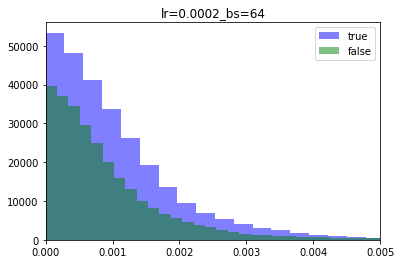

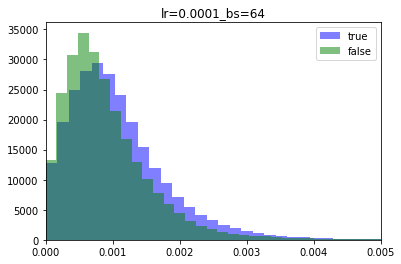

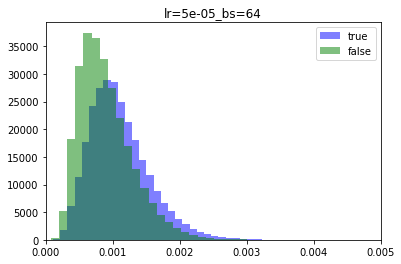

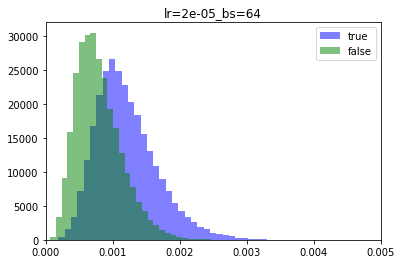

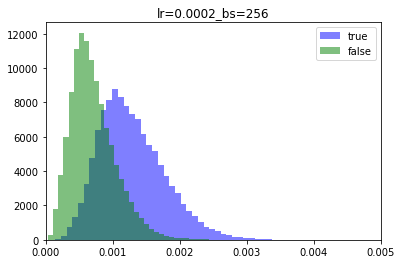

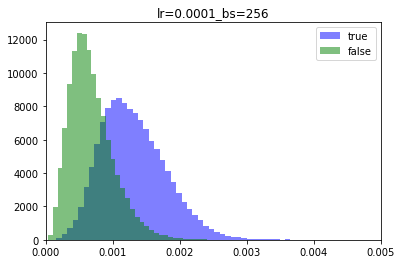

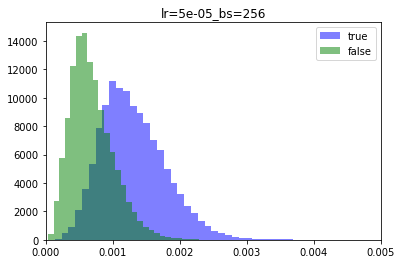

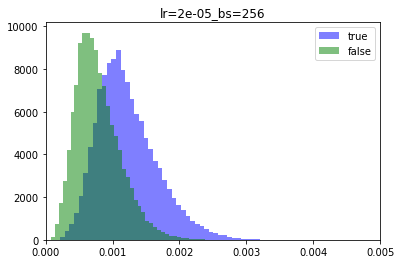

In [185]:
for bs in bs_list:
    for lr in lr_list:
        iterations, arrs = read_arr(lr, bs)
        plot_hist(arrs, title='lr=%s_bs=%d' % (lr, bs))
        